<a href="https://colab.research.google.com/github/abhishekshyp/Exploratory-Data-Analysis/blob/main/matches_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Indian Premier League(IPL) is a professional Twenty20 cricket league in India contested during March or April and May of every year by eight teams representing eight different cities in India. The league was founded by the Board of Control for Cricket in India(BCCI) in 2008. </b>

## <b> Explore and analyze the data to discover results and statistics for different teams playing in IPL. </b>

# **Step 0: Importing the Libraries and Data**

### **In this step we will be importing the dataset and libraries such as pandas, numpy, matplotlib, and seaborn**

In [164]:
# Importing various libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Reading the Matches File from directory
working_directory = '/content/drive/MyDrive/Colab Notebooks/Exploratory Data Analysis/3. IPL/1. Matches Dataset/'
match_df = pd.read_csv(working_directory + 'matches.csv')

# **Step 1: Skimming over the Dataset and Analysing the Data**

### **Before data cleaning and analysing, we need to get general overview of our data**

In [3]:
# Number of Rows and Column of Dataset
match_df.shape

(756, 18)

In [4]:
# Get the type of values each columns contain using info() method
match_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   Season           756 non-null    object
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
# Get the basic overview of our dataset
match_df.describe

<bound method NDFrame.describe of         id    Season  ...         umpire2                  umpire3
0        1  IPL-2017  ...        NJ Llong                      NaN
1        2  IPL-2017  ...          S Ravi                      NaN
2        3  IPL-2017  ...       CK Nandan                      NaN
3        4  IPL-2017  ...   C Shamshuddin                      NaN
4        5  IPL-2017  ...             NaN                      NaN
..     ...       ...  ...             ...                      ...
751  11347  IPL-2019  ...        O Nandan                   S Ravi
752  11412  IPL-2019  ...     Nitin Menon                Ian Gould
753  11413  IPL-2019  ...             NaN                      NaN
754  11414  IPL-2019  ...  Bruce Oxenford  Chettithody Shamshuddin
755  11415  IPL-2019  ...       Ian Gould              Nigel Llong

[756 rows x 18 columns]>

In [6]:
# List of columns
match_df.columns

Index(['id', 'Season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [7]:
# Let us rename some of the dataset column names
match_df.rename(columns = {'Season': 'ipl_season', 'result': 'match_result', 'venue' : 'match_venue'}, inplace = True)

In [8]:
# Print the data
match_df

,id,ipl_season,city,date,team1,team2,toss_winner,toss_decision,match_result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,match_venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin


# **Step 2: Data Cleaning and Processing**

### **In this step we will be cleaning the data (ex: removing null values, and empty columns if any)**

In [9]:
# Get all the Cities name where IPL matches played
match_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [10]:
# Get all the IPL Teams
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [11]:
# As we can see that 'Delhi Daredevils' and 'Delhi Capitals' are same team
# This case is also true for the 'Rising Pune Supergiants', 'Pune Warriors' and 'Rising Pune Supergiant'

## **Values where Data Cleaning is Required**

1. Pune team was named as 'Rising Pune Supergiants', 'Rising Pune Supergiant', 'Pune Warriors' - so now we have to update these names into new one 'Rising Pune Supergiant' in team1, team2, toss_winner, and winner columns
2. Delhi team name also needs to be updated from 'Delhi Daredevils' to the 'Delhi Capitals'

In [12]:
# Updated values dictionary
update_values_dict = {'Rising Pune Supergiants':'Rising Pune Supergiant', 'Delhi Daredevils':'Delhi Capitals', 
                      'Pune Warriors':'Rising Pune Supergiant'}

In [13]:
# Updating the data on real dataset
match_df['team1'].replace(update_values_dict, inplace = True)
match_df['team2'].replace(update_values_dict, inplace = True)

match_df['toss_winner'].replace(update_values_dict, inplace = True)
match_df['winner'].replace(update_values_dict, inplace = True)

In [14]:
# Let us check the updated values
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Capitals', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala'], dtype=object)

3. Banglore city was renamed to Bangaluru, we need to change this too for data analysis

In [15]:
# Update the city values using replace method
match_df['city'].replace({'Bangalore' : 'Bengaluru'}, inplace = True)

In [16]:
# Check updated city values
match_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bengaluru', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali'], dtype=object)

# **Find NaN or Missing Values in the columns**

In [17]:
# Get all the null values from the matches table
match_df.isnull().sum()

id                   0
ipl_season           0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
match_result         0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
match_venue          0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

**As we can see that umpire3 data contain 637 NaN values out of 756 rows - so we decided to drop that column**

In [18]:
# Droping umpire3 column or series
match_df.drop(columns = ['umpire3'], inplace = True)

In [19]:
# Let us check new columns in our dataset
match_df.columns

Index(['id', 'ipl_season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'match_result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'match_venue', 'umpire1',
       'umpire2'],
      dtype='object')

# **Find NaN or Missing Values in the rows**

In [20]:
# Rows with null values using isna() method
match_df[match_df.isna().any(axis = 1)]

,id,ipl_season,city,date,team1,team2,toss_winner,toss_decision,match_result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,match_venue,umpire1,umpire2
4,5,IPL-2017,Bengaluru,08-04-2017,Royal Challengers Bangalore,Delhi Capitals,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN
300,301,IPL-2011,Delhi,21-05-2011,Delhi Capitals,Rising Pune Supergiant,Delhi Capitals,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker
461,462,IPL-2014,NaN,19-04-2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary
462,463,IPL-2014,NaN,19-04-2014,Kolkata Knight Riders,Delhi Capitals,Kolkata Knight Riders,bat,normal,0,Delhi Capitals,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni
466,467,IPL-2014,NaN,23-04-2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth
468,469,IPL-2014,NaN,25-04-2014,Sunrisers Hyderabad,Delhi Capitals,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi
469,470,IPL-2014,NaN,25-04-2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus
474,475,IPL-2014,NaN,28-04-2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi
476,477,IPL-2014,NaN,30-04-2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus
545,546,IPL-2015,Bengaluru,29-04-2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak


**From above observation we can conclude that City with NAN values have venues = "Dubai International Cricket Stadium", so we can add city = Dubai**

In [21]:
# Updating the city values to Dubai
match_df['city'] = match_df['city'].fillna('Dubai')

In [22]:
# Check the updated rows
match_df.loc[461:477]['city']

461        Dubai
462        Dubai
463      Sharjah
464    Abu Dhabi
465      Sharjah
466        Dubai
467      Sharjah
468        Dubai
469        Dubai
470    Abu Dhabi
471    Abu Dhabi
472      Sharjah
473      Sharjah
474        Dubai
475    Abu Dhabi
476        Dubai
477       Ranchi
Name: city, dtype: object

In [23]:
# Final check for any NaN values
match_df.city.isnull().any()

False

# **Step 3: Exploratory Data Analysis**

### **In this step we will be analysing the data**

In [24]:
# Let's create a copy of original dataset
matches_df = match_df

# **Objective - Matches Dataset**
**1. Getting IPL Seasons List**

**2. IPL Seasons start and end date**

**3. How many days each IPL season lasts?**

**4. Number of matches played in each IPL season**

**5. Cities and Venues that hosted most number of IPL matches**

**6. Cities and Venues that hosted most number of IPL finals matches**

**7. Total number of IPL matches played by each team**

**8. Total number of IPL matches won by each team**

**9. IPL matches played vs wins in percentage of each team**

**10. IPL matches each season winner**

**11. Teams won most number of match tosses**

**12. Preferred match decision on winning the toss (bat/field)**

**13. Toss decision proven beneficial (bat/field)**

**14. Umpires in most number of matches**

**15. Team which won by highest runs gap**

**16. Team which won by highest wickets gap**

**17. Player of the match most number of times**

**18. Final Conclusion of Matches DataFrame**

## **Task-1 Ipl Season List**

### **We will be getting all ipl seasons list from matches dataset**

In [25]:
# List of IPL Season
season_list = matches_df['ipl_season'].unique()

In [26]:
# Let's sort the season list
season_list.sort()

In [27]:
# Print Season List
season_list

array(['IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011', 'IPL-2012',
       'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016', 'IPL-2017',
       'IPL-2018', 'IPL-2019'], dtype=object)

## **Conclusion**

**We have IPL Seasons data from 2008 to 2019 (12 years of data)**

## **Task-2 Ipl Season Start and End Date**

### **Here we will be getting Start and End Dates of each IPL season**

In [28]:
# Creating Season Empty Dataframe
season_df = pd.DataFrame()

In [29]:
# Getting Start Date of each IPL season
start_season_date_df = (matches_df.groupby('ipl_season').head(1).copy()).sort_values('ipl_season').reset_index()

In [30]:
# Getting End Date of each IPL season
end_season_date_df = (matches_df.groupby('ipl_season').tail(1).copy()).sort_values('ipl_season').reset_index()

In [31]:
# Adding IPL Season column
season_list

array(['IPL-2008', 'IPL-2009', 'IPL-2010', 'IPL-2011', 'IPL-2012',
       'IPL-2013', 'IPL-2014', 'IPL-2015', 'IPL-2016', 'IPL-2017',
       'IPL-2018', 'IPL-2019'], dtype=object)

In [32]:
# Storing start and end date in season table
season_df['ipl_season'] = season_list
season_df['season_start_date'] = start_season_date_df['date']
season_df['season_end_date'] = end_season_date_df['date']

In [33]:
# Print Season df
season_df

,ipl_season,season_start_date,season_end_date
0,IPL-2008,18-04-2008,01-06-2008
1,IPL-2009,18-04-2009,24-05-2009
2,IPL-2010,12-03-2010,25-04-2010
3,IPL-2011,08-04-2011,28-05-2011
4,IPL-2012,04-04-2012,27-05-2012
5,IPL-2013,03-04-2013,26-05-2013
6,IPL-2014,16-04-2014,01-06-2014
7,IPL-2015,08-04-2015,24-05-2015
8,IPL-2016,09-04-2016,29-05-2016
9,IPL-2017,05-04-2017,21-05-2017


## **Task-3 How many days each IPL Season lasts?**

### **Here we will be getting number of days each IPL Season lasts**

In [34]:
# Let's check the season_start_date values type
type(season_df['season_start_date'][0])

str

In [35]:
# Converting the string date to datetime object
season_df['season_end_date'] = pd.to_datetime(season_df['season_end_date'], format = '%d-%m-%Y')
season_df['season_start_date'] = pd.to_datetime(season_df['season_start_date'], format = '%d-%m-%Y')

In [36]:
# Let's check the season_start_date values type
type(season_df['season_start_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [37]:
# Subtracting the start date from end date to find number of days each season lasts
season_df['no_of_days_season_lasts'] = season_df['season_end_date'] - season_df['season_start_date']

In [38]:
# Print season_df
season_df

,ipl_season,season_start_date,season_end_date,no_of_days_season_lasts
0,IPL-2008,2008-04-18,2008-06-01,44 days
1,IPL-2009,2009-04-18,2009-05-24,36 days
2,IPL-2010,2010-03-12,2010-04-25,44 days
3,IPL-2011,2011-04-08,2011-05-28,50 days
4,IPL-2012,2012-04-04,2012-05-27,53 days
5,IPL-2013,2013-04-03,2013-05-26,53 days
6,IPL-2014,2014-04-16,2014-06-01,46 days
7,IPL-2015,2015-04-08,2015-05-24,46 days
8,IPL-2016,2016-04-09,2016-05-29,50 days
9,IPL-2017,2017-04-05,2017-05-21,46 days


In [39]:
# Now it's time to convert the datetime values to int values
for i in range(0, len(season_df)):
  days = int(str(season_df['no_of_days_season_lasts'][i])[:2])
  season_df['no_of_days_season_lasts'][i] = days

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [40]:
# Print season_df
season_df

,ipl_season,season_start_date,season_end_date,no_of_days_season_lasts
0,IPL-2008,2008-04-18,2008-06-01,44
1,IPL-2009,2009-04-18,2009-05-24,36
2,IPL-2010,2010-03-12,2010-04-25,44
3,IPL-2011,2011-04-08,2011-05-28,50
4,IPL-2012,2012-04-04,2012-05-27,53
5,IPL-2013,2013-04-03,2013-05-26,53
6,IPL-2014,2014-04-16,2014-06-01,46
7,IPL-2015,2015-04-08,2015-05-24,46
8,IPL-2016,2016-04-09,2016-05-29,50
9,IPL-2017,2017-04-05,2017-05-21,46


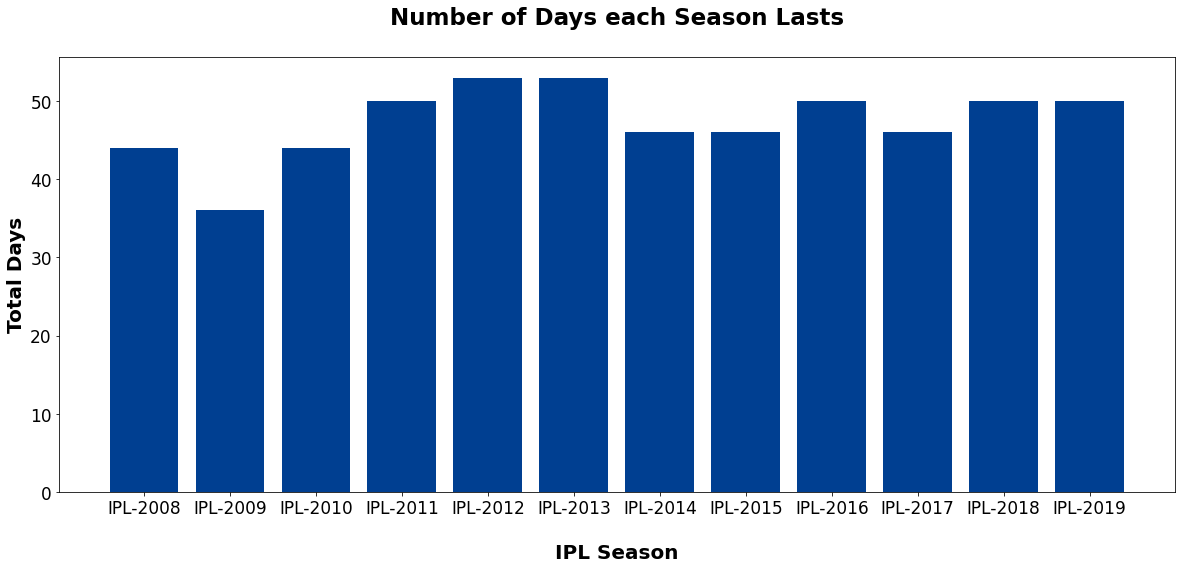

In [41]:
# Lets Plot a Graph to know visually which season lasts most number of days
plt.figure(figsize = (20, 8))

plt.xlabel('\nIPL Season', fontweight = 'bold', fontsize = 20)
plt.ylabel('Total Days', fontweight = 'bold', fontsize = 20)
plt.title("Number of Days each Season Lasts\n", fontweight = 'bold', fontsize = 23)

plt.tick_params(labelsize = 17)

plt.bar(season_df['ipl_season'], season_df['no_of_days_season_lasts'], color = ['#003F91']);

## **Conclusion**

**IPL season 2012 and 2013 both lasted most number of days - 53 days, followed by the 2011, 2016, 2018, 2019 - 50 days**

## **Task-4 Number of Matches played in each season**

### **In this task we will be getting number of matches played in each IPL season**

In [42]:
# Creating dictionary of no of matches played in each IPL Season
number_of_matches = dict(matches_df.groupby('ipl_season')['id'].count())

In [43]:
# Print dictionary number_of_matches
number_of_matches

{'IPL-2008': 58,
 'IPL-2009': 57,
 'IPL-2010': 60,
 'IPL-2011': 73,
 'IPL-2012': 74,
 'IPL-2013': 76,
 'IPL-2014': 60,
 'IPL-2015': 59,
 'IPL-2016': 60,
 'IPL-2017': 59,
 'IPL-2018': 60,
 'IPL-2019': 60}

In [44]:
# Converting Dictionary to number of matches column
season_df['no_of_matches'] = number_of_matches.values()

In [45]:
# Print season_df
season_df

,ipl_season,season_start_date,season_end_date,no_of_days_season_lasts,no_of_matches
0,IPL-2008,2008-04-18,2008-06-01,44,58
1,IPL-2009,2009-04-18,2009-05-24,36,57
2,IPL-2010,2010-03-12,2010-04-25,44,60
3,IPL-2011,2011-04-08,2011-05-28,50,73
4,IPL-2012,2012-04-04,2012-05-27,53,74
5,IPL-2013,2013-04-03,2013-05-26,53,76
6,IPL-2014,2014-04-16,2014-06-01,46,60
7,IPL-2015,2015-04-08,2015-05-24,46,59
8,IPL-2016,2016-04-09,2016-05-29,50,60
9,IPL-2017,2017-04-05,2017-05-21,46,59


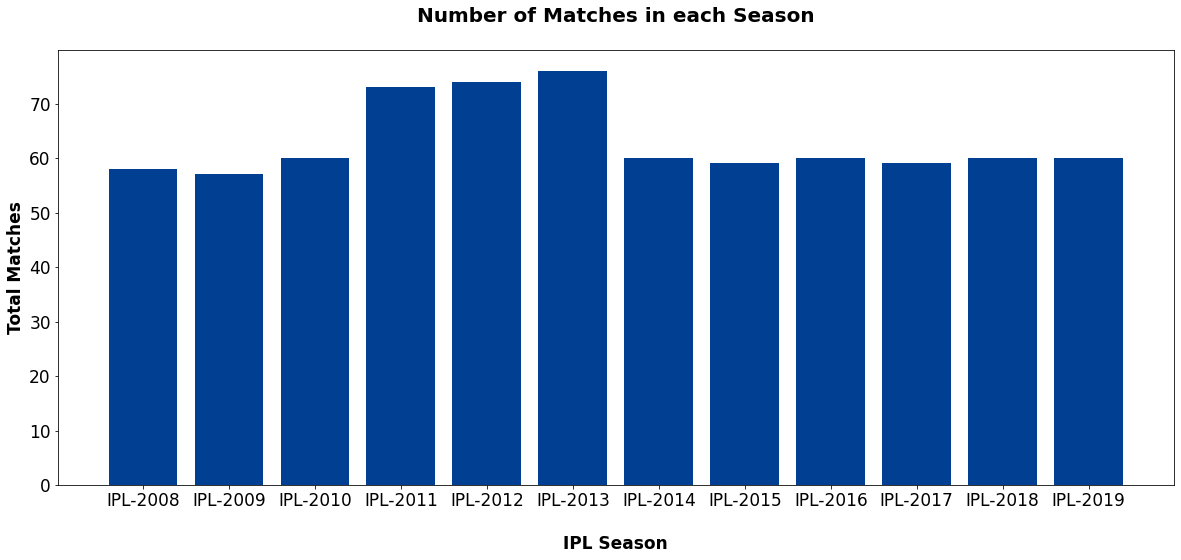

In [46]:
# Lets Plot a Graph for better understanding
plt.figure(figsize = (20, 8))

plt.xlabel('\nIPL Season', fontweight = 'bold', fontsize = 17)
plt.ylabel('Total Matches', fontweight = 'bold', fontsize = 17)
plt.title("Number of Matches in each Season\n", fontweight = 'bold', fontsize = 20)

plt.tick_params(labelsize = 17)

plt.bar(season_df['ipl_season'], season_df['no_of_matches'], color = ['#003F91']);

## **Conclusion**

**Teams in IPL Season-2013 had played most number of matches - 76 matches**

**Followed by the IPL Season-2012 in most number of matches played - 74 matches**

## **Task-5 How many IPL matches hosted by each city and Venue?**

### **Let's get the city and venue which hosted most number of matches**

In [47]:
# Create city empty dataframe
city_df = pd.DataFrame()

In [48]:
# Getting the city matches from match_df
city_df = match_df.groupby('city')[['id']].count()

In [49]:
# Sort and rename the columns
city_df = city_df.sort_values('id', ascending = True).reset_index()
city_df.rename(columns = {'id' : 'city_match_total', 'city' : 'City'}, inplace = True)

In [50]:
# Print city_df
city_df

,City,city_match_total
0,Bloemfontein,2
1,Nagpur,3
2,Kimberley,3
3,East London,3
4,Kanpur,4
5,Kochi,5
6,Raipur,6
7,Sharjah,6
8,Abu Dhabi,7
9,Ranchi,7


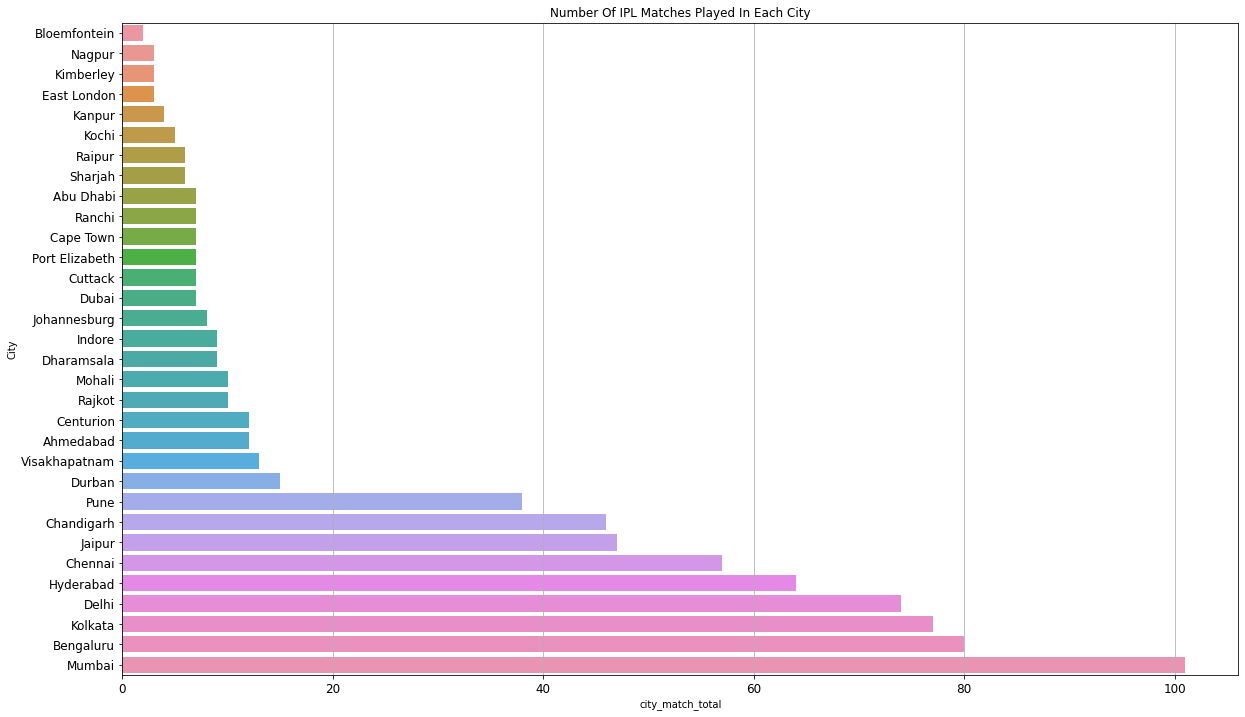

In [51]:
# Plot the chart for city matches
plt.figure(figsize = (20, 12))
plt.grid()

plt.tick_params(labelsize = 12)
plt.title('Number Of IPL Matches Played In Each City')

sns.barplot(x = 'city_match_total', y = 'City', data = city_df);

In [52]:
# Create venue empty dataframe
venue_df = pd.DataFrame()

In [53]:
# Getting the venues from match_df
venue_df = matches_df.groupby('match_venue')[['id']].count()

In [54]:
# Sort and rename the columns
venue_df = venue_df.sort_values('id', ascending = False).reset_index()
venue_df.rename(columns = {'id' : 'venue_match_total', 'match_venue' : 'Stadium'}, inplace = True)

In [55]:
# Print venue_Df
venue_df

,Stadium,venue_match_total
0,Eden Gardens,77
1,Wankhede Stadium,73
2,M Chinnaswamy Stadium,73
3,Feroz Shah Kotla,67
4,"Rajiv Gandhi International Stadium, Uppal",56
5,"MA Chidambaram Stadium, Chepauk",49
6,Sawai Mansingh Stadium,47
7,"Punjab Cricket Association Stadium, Mohali",35
8,Maharashtra Cricket Association Stadium,21
9,Dr DY Patil Sports Academy,17


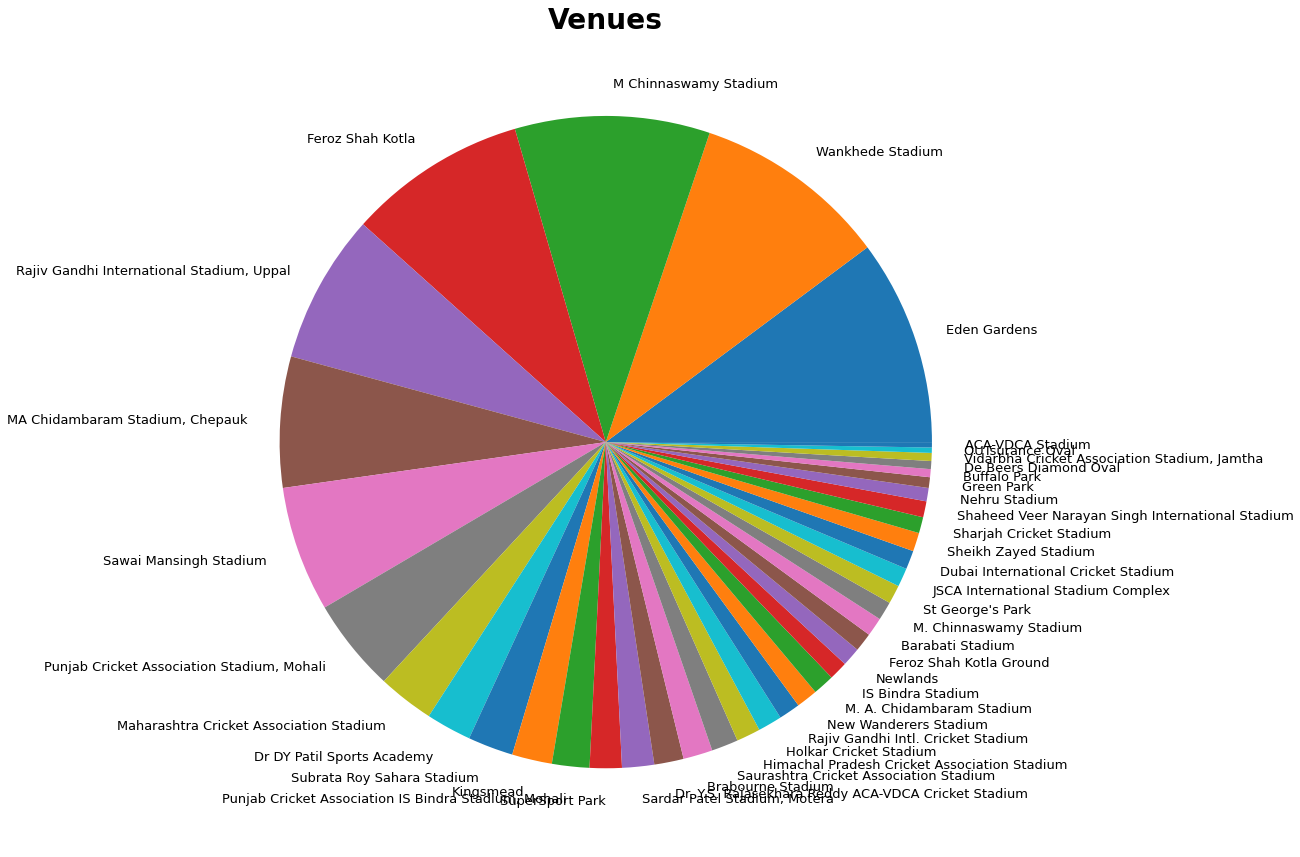

In [56]:
# Plot the pie chart for venue matches
labels = list(venue_df['Stadium'])

plt.figure(figsize = (15, 15))

plt.title("Venues", fontweight = 'bold', fontsize = 28)
plt.tick_params(labelsize = 35)
plt.pie(venue_df['venue_match_total'], labels = labels, textprops = {'fontsize' : 13});

## **Conclusion**

**Mumbai (101) and Bengaluru (80), are top 2 cities that hosted most number of IPL matches**

**Eden Gardens (77), Wankhede Stadium (73) and M Chinnaswamy Stadium (73), are top 3 venues that hosted most number IPL matches**

## **Task-6 City and Venue that hosted most number of IPL finals**

### **Let's see the city and venue which hosted most number of IPL finals match**

In [57]:
# Getting Finals data of each season
end_season_date_df = (matches_df.groupby('ipl_season').tail(1).copy()).sort_values('ipl_season').reset_index()

In [58]:
# Print finals date data
end_season_date_df

,index,id,ipl_season,city,date,team1,team2,toss_winner,toss_decision,match_result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,match_venue,umpire1,umpire2
0,116,117,IPL-2008,Mumbai,01-06-2008,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Rajasthan Royals,0,3,YK Pathan,Dr DY Patil Sports Academy,BF Bowden,RE Koertzen
1,173,174,IPL-2009,Johannesburg,24-05-2009,Deccan Chargers,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Deccan Chargers,6,0,A Kumble,New Wanderers Stadium,RE Koertzen,SJA Taufel
2,233,234,IPL-2010,Mumbai,25-04-2010,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Chennai Super Kings,22,0,SK Raina,Dr DY Patil Sports Academy,RE Koertzen,SJA Taufel
3,306,307,IPL-2011,Chennai,28-05-2011,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,58,0,M Vijay,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
4,380,381,IPL-2012,Chennai,27-05-2012,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,0,Kolkata Knight Riders,0,5,MS Bisla,"MA Chidambaram Stadium, Chepauk",BF Bowden,SJA Taufel
5,456,457,IPL-2013,Kolkata,26-05-2013,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,23,0,KA Pollard,Eden Gardens,HDPK Dharmasena,SJA Taufel
6,516,517,IPL-2014,Bengaluru,01-06-2014,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,3,MK Pandey,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
7,575,576,IPL-2015,Kolkata,24-05-2015,Mumbai Indians,Chennai Super Kings,Chennai Super Kings,field,normal,0,Mumbai Indians,41,0,RG Sharma,Eden Gardens,HDPK Dharmasena,RK Illingworth
8,635,636,IPL-2016,Bengaluru,29-05-2016,Sunrisers Hyderabad,Royal Challengers Bangalore,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,8,0,BCJ Cutting,M Chinnaswamy Stadium,HDPK Dharmasena,BNJ Oxenford
9,58,59,IPL-2017,Hyderabad,21-05-2017,Mumbai Indians,Rising Pune Supergiant,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,KH Pandya,"Rajiv Gandhi International Stadium, Uppal",NJ Llong,S Ravi


In [59]:
# Get finals venue data
finals_venue_df = end_season_date_df.groupby('match_venue')[['id']].count()

In [60]:
# Let's sort the data and rename the columns name where required
finals_venue_df = finals_venue_df.sort_values('id', ascending = False).reset_index()
finals_venue_df.rename(columns = {'id':'venue_match_total', 'match_venue':'Venue'}, inplace = True)

In [61]:
# Print finals venue dataframe
finals_venue_df

,Venue,venue_match_total
0,Dr DY Patil Sports Academy,2
1,Eden Gardens,2
2,M Chinnaswamy Stadium,2
3,"MA Chidambaram Stadium, Chepauk",2
4,New Wanderers Stadium,1
5,"Rajiv Gandhi International Stadium, Uppal",1
6,Rajiv Gandhi Intl. Cricket Stadium,1
7,Wankhede Stadium,1


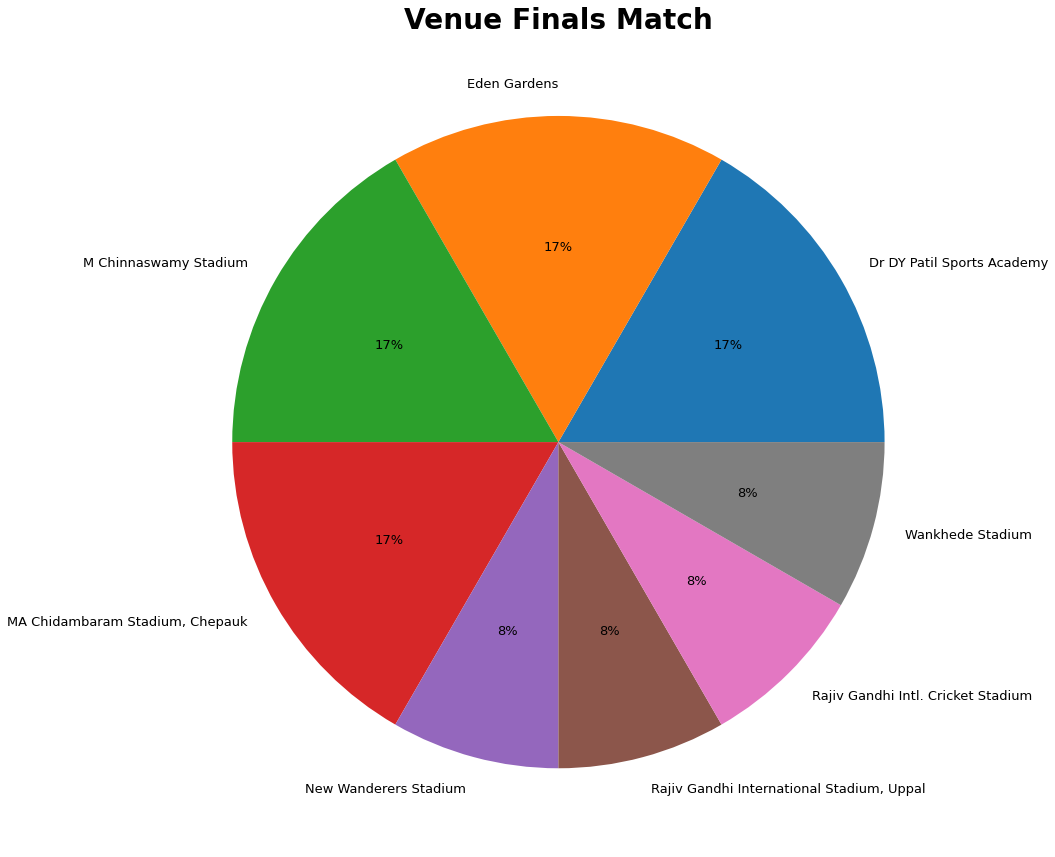

In [62]:
# Plot the pie chart for final matches
labels = list(finals_venue_df['Venue'])
plt.figure(figsize = (15, 15))

plt.title("Venue Finals Match", fontweight = 'bold', fontsize = 28)
plt.tick_params(labelsize = 35)

plt.pie(finals_venue_df['venue_match_total'], labels = labels, autopct='%1.0f%%', textprops = {'fontsize' : 13});

In [63]:
# Get finals city data
finals_city_df = end_season_date_df.groupby('city')[['id']].count()

In [64]:
# Sort the city data and rename the columns
finals_city_df = finals_city_df.sort_values('id', ascending = False).reset_index()
finals_city_df.rename(columns = {'id' : 'city_match_total', 'city' : 'City'}, inplace = True)

In [65]:
# Print the city data
finals_city_df

,City,city_match_total
0,Mumbai,3
1,Bengaluru,2
2,Chennai,2
3,Hyderabad,2
4,Kolkata,2
5,Johannesburg,1


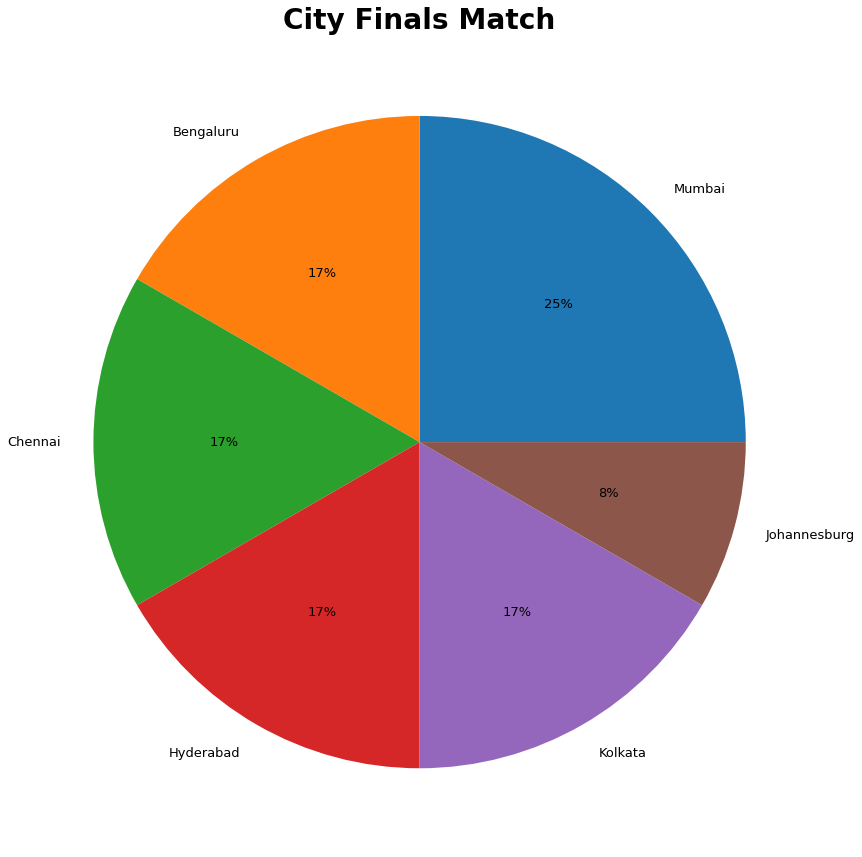

In [66]:
# Plot the pie chart for city matches
labels = list(finals_city_df['City'])
plt.figure(figsize = (15, 15))

plt.title("City Finals Match", fontweight = 'bold', fontsize = 28)
plt.tick_params(labelsize = 35)

plt.pie(finals_city_df['city_match_total'], labels = labels, autopct='%1.0f%%', textprops = {'fontsize' : 13});

## **Conclusion**

**Mumbai (25%) and Bengaluru, Chennai, Hyderabad, Kolkata (17%) are cities that hosted most number of IPL finals**

**Dr DY Patil Sports Academy, Eden Gardens, M Chinnaswamy Stadium, Chidambaram Stadium, Chepauk are venues that hosted most number of IPL finals**

## **Task-7 Total number of IPL matches played by each team**

### **Get the total number of IPL matches played by each team**

In [67]:
# Empty dataset for no of matches played by each team
matches_played_df = pd.DataFrame()

In [68]:
# Getting Teams data
matches_played_df['Teams'] = pd.concat([matches_df['team1'],matches_df['team2']])

In [69]:
# Print match played df
matches_played_df

,Teams
0,Sunrisers Hyderabad
1,Mumbai Indians
2,Gujarat Lions
3,Rising Pune Supergiant
4,Royal Challengers Bangalore
...,...
751,Mumbai Indians
752,Mumbai Indians
753,Delhi Capitals
754,Chennai Super Kings


In [70]:
# Calculating the number of matches played by each team
matches_played_df = matches_played_df.value_counts().reset_index()
matches_played_df.columns = ['Teams', 'total_matches']

In [71]:
# Print match played df
matches_played_df

,Teams,total_matches
0,Mumbai Indians,187
1,Royal Challengers Bangalore,180
2,Kolkata Knight Riders,178
3,Delhi Capitals,177
4,Kings XI Punjab,176
5,Chennai Super Kings,164
6,Rajasthan Royals,147
7,Sunrisers Hyderabad,108
8,Rising Pune Supergiant,76
9,Deccan Chargers,75


In [72]:
# Let sort the tabel in ascending order
matches_played_df = matches_played_df.sort_values('total_matches', ascending = True)

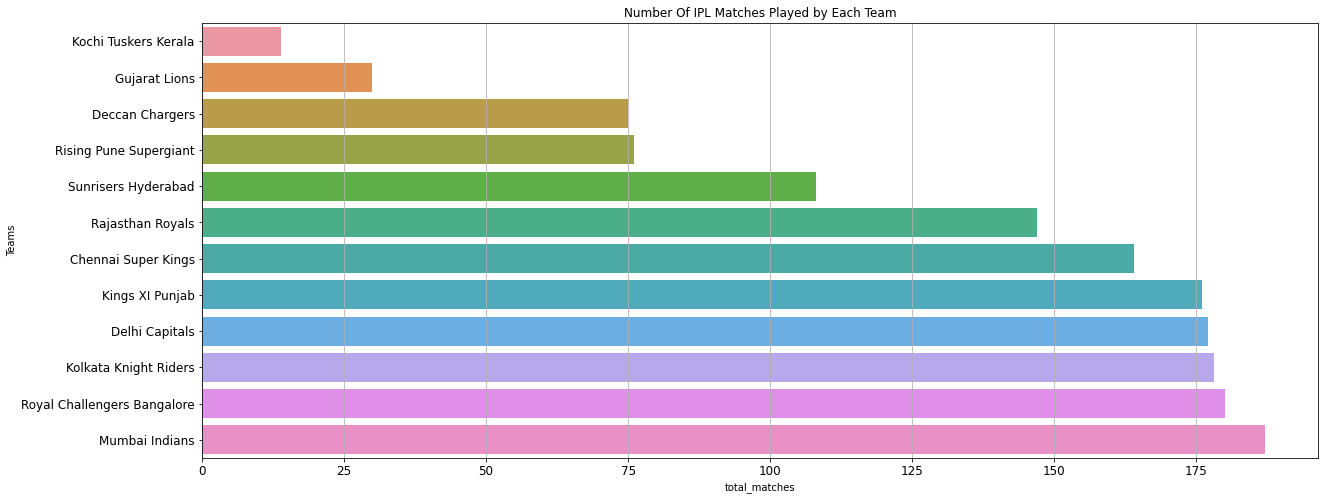

In [73]:
# Plot the chart for number of matches played by each team
plt.figure(figsize = (20, 8))
plt.grid()

plt.tick_params(labelsize = 12)
plt.title('Number Of IPL Matches Played by Each Team')

sns.barplot(x = 'total_matches', y = 'Teams', data = matches_played_df);

## **Conclusion**

**We can say that Mumbai Indians played most number of matches - 187, folowed by the Royal Challangers Bangalore - 180**

## **Task-8 Total number of IPL matches won by each team**

### **In this step we will be getting the ipl team total matches wins**

In [74]:
# Winners data
team_match_wins_df = matches_df.groupby('winner')[['id']].count()

In [75]:
# Let's sort and rename the columns name
team_match_wins_df = team_match_wins_df.sort_values('id', ascending = False).reset_index()
team_match_wins_df.rename(columns = {'id' : 'total_wins', 'winner' : 'Team'}, inplace = True)

In [76]:
# Print the team match wins
team_match_wins_df

,Team,total_wins
0,Mumbai Indians,109
1,Chennai Super Kings,100
2,Kolkata Knight Riders,92
3,Royal Challengers Bangalore,84
4,Kings XI Punjab,82
5,Delhi Capitals,77
6,Rajasthan Royals,75
7,Sunrisers Hyderabad,58
8,Deccan Chargers,29
9,Rising Pune Supergiant,27


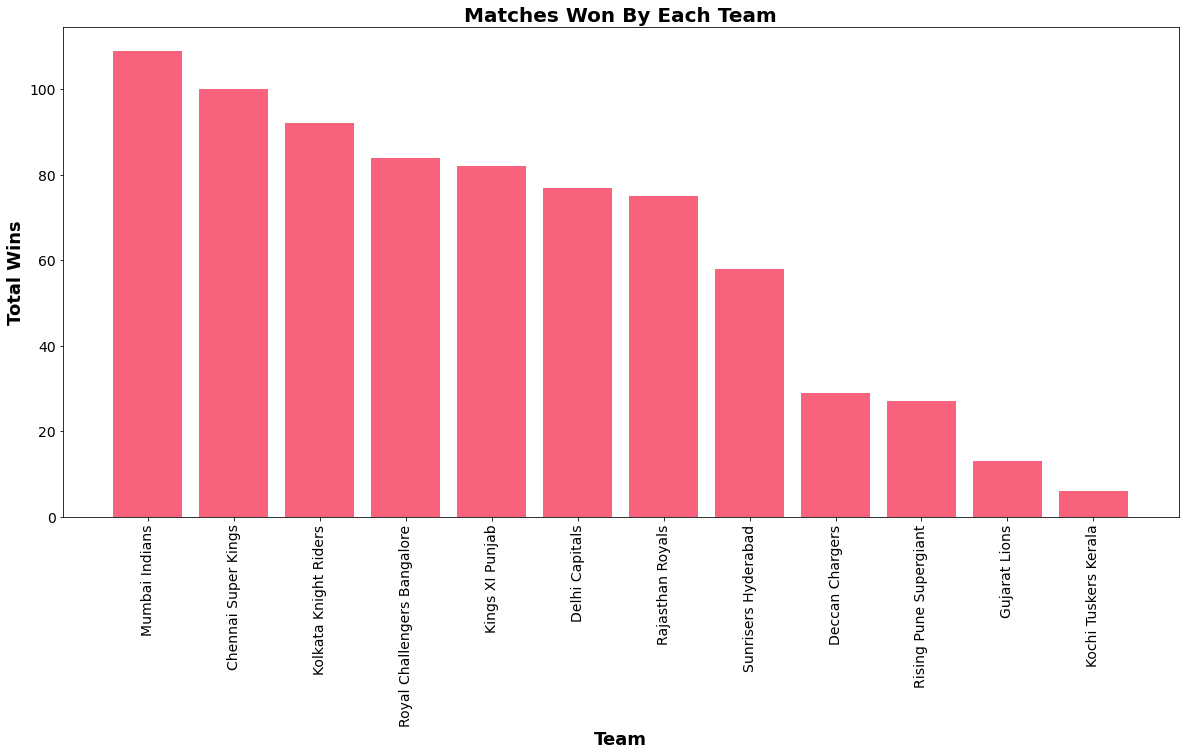

In [77]:
# Plot the graph of team and their wins
plt.figure(figsize = (20, 9))
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 14)

plt.xlabel('Team', fontweight = 'bold', fontsize = 18)
plt.ylabel('Total Wins', fontweight = 'bold', fontsize = 18)
plt.title('Matches Won By Each Team', fontweight = 'bold', fontsize = 20);

plt.bar(team_match_wins_df['Team'], team_match_wins_df['total_wins'], color = ['#F9627D']);

## **Conclusion**

**We can say that Mumbai Indians won most number of matches - 109, folowed by the Chennai Super Kings - 100**

## **Task-9 IPL matches played vs wins by each team in percentage**

### **In this step we will be getting the ipl matches played vs wins by each team in percentage**

In [78]:
# Copy of team win dataset
matches_played_vs_wins_df = team_match_wins_df

In [79]:
# Adding Empty column in total win dataset
matches_played_vs_wins_df['matches_played'] = 0

In [80]:
# Revert the order
matches_played_df = matches_played_df.sort_values('total_matches', ascending = False)

In [81]:
# Function to Add Matches Played column to Total Wins DF
def add_match_played_col(matches_played, team_name):
  
  # Iterate over the total wins data
  for ind in matches_played_vs_wins_df.index:
    if matches_played_vs_wins_df['Team'][ind] == team_name:
      matches_played_vs_wins_df['matches_played'][ind] = matches_played
  
  return

In [82]:
# Iterate over the match played data
for ind in matches_played_df.index:
  add_match_played_col(matches_played_df['total_matches'][ind], matches_played_df['Teams'][ind])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [83]:
# Print the df
matches_played_vs_wins_df

,Team,total_wins,matches_played
0,Mumbai Indians,109,187
1,Chennai Super Kings,100,164
2,Kolkata Knight Riders,92,178
3,Royal Challengers Bangalore,84,180
4,Kings XI Punjab,82,176
5,Delhi Capitals,77,177
6,Rajasthan Royals,75,147
7,Sunrisers Hyderabad,58,108
8,Deccan Chargers,29,75
9,Rising Pune Supergiant,27,76


In [84]:
# Create new dataset for percentage win
percentage_played_vs_wins_df = pd.DataFrame()

In [85]:
# Calculate the percentage wins of each team
percentage_win_column = round(matches_played_vs_wins_df['total_wins'] / matches_played_vs_wins_df['matches_played'], 3) * 100

In [86]:
# Adding column to df
matches_played_vs_wins_df['percentage_win'] = percentage_win_column

In [87]:
# Print the df
matches_played_vs_wins_df

,Team,total_wins,matches_played,percentage_win
0,Mumbai Indians,109,187,58.3
1,Chennai Super Kings,100,164,61.0
2,Kolkata Knight Riders,92,178,51.7
3,Royal Challengers Bangalore,84,180,46.7
4,Kings XI Punjab,82,176,46.6
5,Delhi Capitals,77,177,43.5
6,Rajasthan Royals,75,147,51.0
7,Sunrisers Hyderabad,58,108,53.7
8,Deccan Chargers,29,75,38.7
9,Rising Pune Supergiant,27,76,35.5


In [88]:
# Lets plot this data frame
matches_played = go.Bar(x = matches_played_vs_wins_df['Team'], y = matches_played_vs_wins_df['matches_played'], name = 'Total Matches Played', marker = dict(color = '#FF4365'))
total_wins = go.Bar(x = matches_played_vs_wins_df['Team'], y = matches_played_vs_wins_df['total_wins'], name = 'Matches Won', marker = dict(color = '#00D9C0'))
percentage_win = go.Bar(x = matches_played_vs_wins_df['Team'], y = matches_played_vs_wins_df['percentage_win'], name = 'Win Percentage', marker = dict(color = '#FFC43D'))

data = [matches_played, total_wins, percentage_win]

In [89]:
from plotly.offline import iplot

layout = go.Layout(title = 'Match Played, Matches Wins and Win Percentage', xaxis = dict(title = 'Team'), yaxis = dict(title = 'Total'), bargap = 0.2, bargroupgap = 0.1)
figure = go.Figure(data = data, layout = layout)
iplot(figure)

## **Conclusion**

**Chennai Super Kings tops the total matches percentage wins - 61%, followed by the Mumbai Indians won 58.3%**

## **Task-10 IPL matches each season winner**

### **Let us look at the ipl each season winner**

In [90]:
# Getting Season finals data
finals_df = (match_df.groupby('ipl_season').tail(1).copy()).sort_values('ipl_season').reset_index()

In [91]:
# Creating empty dataset
season_winner_df = pd.DataFrame()

In [92]:
# IPL each season winner team
season_winner_df['ipl_season'] = finals_df['ipl_season']
season_winner_df['season_winner'] = finals_df['winner']

In [93]:
# Print the dataset
season_winner_df

,ipl_season,season_winner
0,IPL-2008,Rajasthan Royals
1,IPL-2009,Deccan Chargers
2,IPL-2010,Chennai Super Kings
3,IPL-2011,Chennai Super Kings
4,IPL-2012,Kolkata Knight Riders
5,IPL-2013,Mumbai Indians
6,IPL-2014,Kolkata Knight Riders
7,IPL-2015,Mumbai Indians
8,IPL-2016,Sunrisers Hyderabad
9,IPL-2017,Mumbai Indians


In [94]:
# Count number of times each team wins the IPL trphy
winner_df = finals_df.groupby('winner')[['id']].count()

In [95]:
# Sort and rename the columns
winner_df = winner_df.sort_values('id', ascending = False).reset_index()
winner_df.rename(columns = {'id' : 'no_of_times', 'winner' : 'season_winner_team'}, inplace = True)

In [96]:
# Print each season winner data
winner_df

,season_winner_team,no_of_times
0,Mumbai Indians,4
1,Chennai Super Kings,3
2,Kolkata Knight Riders,2
3,Deccan Chargers,1
4,Rajasthan Royals,1
5,Sunrisers Hyderabad,1


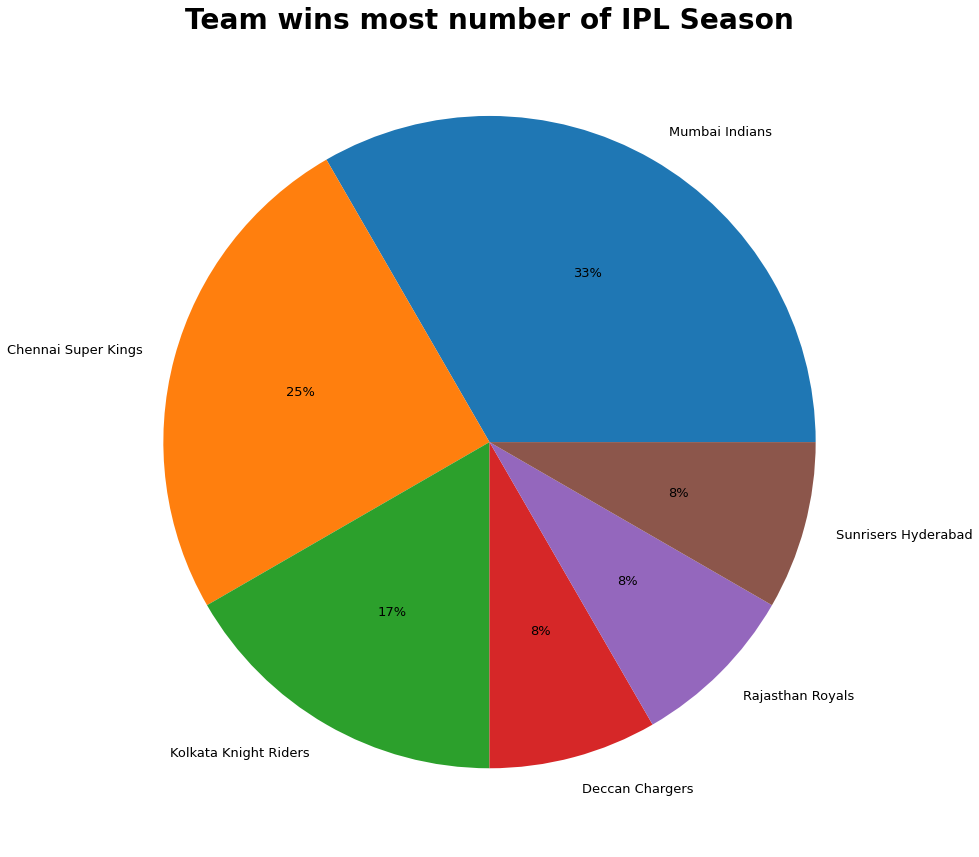

In [97]:
# Plot the pie chart for team winners
labels = list(winner_df['season_winner_team'])
plt.figure(figsize = (15, 15))

plt.title("Team wins most number of IPL Season", fontweight = 'bold', fontsize = 28)
plt.tick_params(labelsize = 35)
plt.pie(winner_df['no_of_times'], labels = labels, autopct='%1.0f%%', textprops = {'fontsize' : 13});

## **Conclusion**

**Mumbai Indians won most number of IPL Seasons (4 IPL seasons - 33%), followed by the Chennai Super Kings (3 IPL seasons - 25%)**

## **Task-11 Teams won most number of match toss**

### **Find out the team who won most number of match toss overall as well as in particular season**

In [98]:
# Team that won most number of tosses overall
toss_winners = match_df.groupby('toss_winner')[['id']].count()

In [99]:
# Let's sort and update the columns name
toss_winners = toss_winners.sort_values('id', ascending = False).reset_index()
toss_winners.rename(columns = {'id' : 'total_wins', 'toss_winner' : 'Team'}, inplace = True)

In [100]:
# Mumbai Indians won most number of tosses
toss_winners

,Team,total_wins
0,Mumbai Indians,98
1,Kolkata Knight Riders,92
2,Delhi Capitals,90
3,Chennai Super Kings,89
4,Kings XI Punjab,81
5,Royal Challengers Bangalore,81
6,Rajasthan Royals,80
7,Sunrisers Hyderabad,46
8,Deccan Chargers,43
9,Rising Pune Supergiant,33


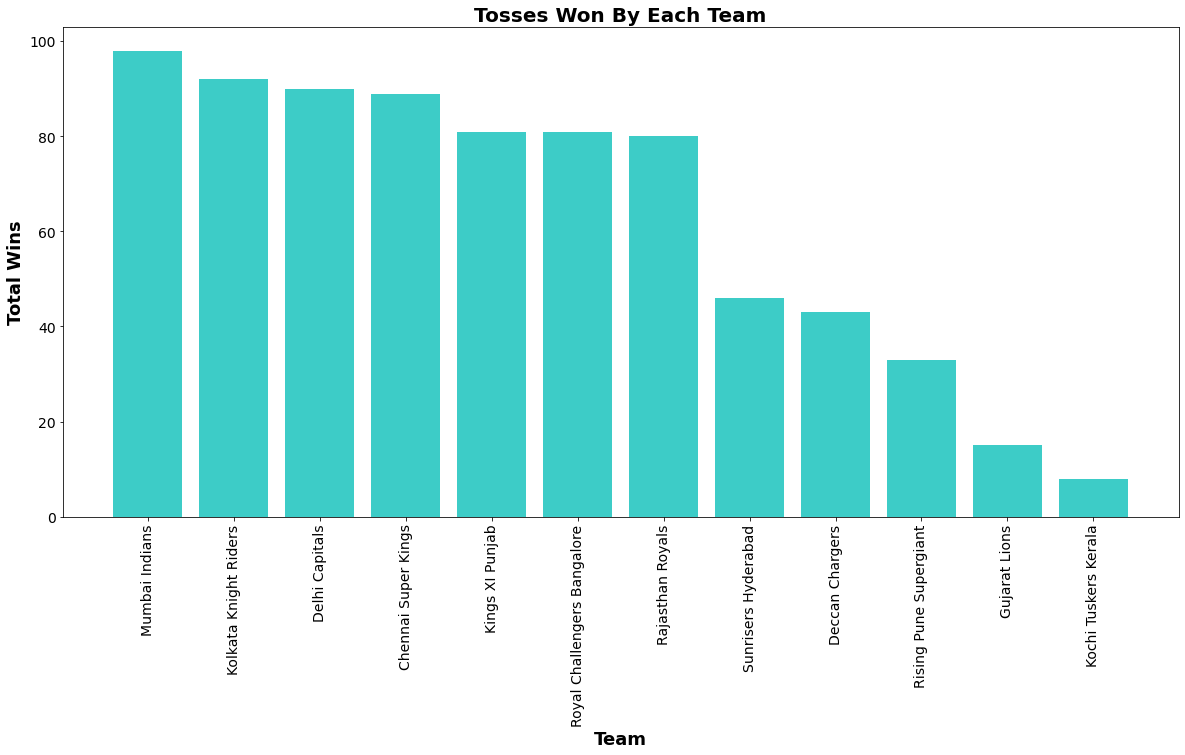

In [101]:
# Lets plot the tosses won by each team
plt.figure(figsize = (20, 9))
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 14)

plt.xlabel('Team', fontweight = 'bold', fontsize = 18)
plt.ylabel('Total Wins', fontweight = 'bold', fontsize = 18)
plt.title('Tosses Won By Each Team', fontweight = 'bold', fontsize = 20);

plt.bar(toss_winners['Team'], toss_winners['total_wins'], color = ['#3DCCC7']);

In [102]:
# Teams that won most number of tosses in each season


In [103]:
# Function to find the toss winner of each season tosses 
def toss_winner_season(ipl_season_name):
  '''
    This function finds the toss winner of each season
  '''
  season_match_df = match_df[match_df['ipl_season'] == ipl_season_name]
  ipl_season_toss_winner_df = season_match_df.groupby('toss_winner')[['id']].count()

  ipl_season_toss_winner_df = ipl_season_toss_winner_df.sort_values('id', ascending = False).reset_index()
  ipl_season_toss_winner_df.rename(columns = {'id' : 'total_wins', 'toss_winner' : 'Team'}, inplace = True)
  
  return ipl_season_toss_winner_df['Team'][0]

In [104]:
# List of IPL season
ipl_season_list = list(match_df['ipl_season'].unique())
ipl_season_list.sort()

In [105]:
# Print the season list
ipl_season_list

['IPL-2008',
 'IPL-2009',
 'IPL-2010',
 'IPL-2011',
 'IPL-2012',
 'IPL-2013',
 'IPL-2014',
 'IPL-2015',
 'IPL-2016',
 'IPL-2017',
 'IPL-2018',
 'IPL-2019']

In [106]:
# Creating empty dictionary for toss winner in every season
toss_winner_dict = {}

In [107]:
# Loop over each ipl season and get season toss winner
for item in ipl_season_list:
  # Call a function
  toss_winner_dict[item] = toss_winner_season(item)

In [108]:
# Print dictionary
toss_winner_dict

{'IPL-2008': 'Rajasthan Royals',
 'IPL-2009': 'Deccan Chargers',
 'IPL-2010': 'Chennai Super Kings',
 'IPL-2011': 'Kings XI Punjab',
 'IPL-2012': 'Mumbai Indians',
 'IPL-2013': 'Kolkata Knight Riders',
 'IPL-2014': 'Chennai Super Kings',
 'IPL-2015': 'Chennai Super Kings',
 'IPL-2016': 'Sunrisers Hyderabad',
 'IPL-2017': 'Mumbai Indians',
 'IPL-2018': 'Chennai Super Kings',
 'IPL-2019': 'Chennai Super Kings'}

In [109]:
# Convert dictionary to dataframe
toss_winner_season_df = pd.DataFrame.from_dict(toss_winner_dict, orient='index', columns=['Teams'])

In [110]:
# Here are the teams that won most number of match tosses in particular season
toss_winner_season_df

,Teams
IPL-2008,Rajasthan Royals
IPL-2009,Deccan Chargers
IPL-2010,Chennai Super Kings
IPL-2011,Kings XI Punjab
IPL-2012,Mumbai Indians
IPL-2013,Kolkata Knight Riders
IPL-2014,Chennai Super Kings
IPL-2015,Chennai Super Kings
IPL-2016,Sunrisers Hyderabad
IPL-2017,Mumbai Indians


## **Conclusion**

**Mumbai Indians won most number of IPL match tosses - 98, followed by the Kolkata Knight Riders - 92**

**Now we have the list of teams that won most number of tosses in each season here Chennai Super Kings won most number seasons tosses**

## **Task-12 Match Decision on winning the toss (bat/field)**

### **In this step we will be getting the preferred match decision on winning the toss**

In [111]:
# Gettting the toss decision items
ipl_toss_win = match_df['toss_decision'].unique()

In [112]:
# It is clear that there are only two option bat or field
ipl_toss_win

array(['field', 'bat'], dtype=object)

In [113]:
# Lets get the decision data
decision_df = match_df.groupby('toss_decision')[['id']].count()
decision_df = decision_df.sort_values('id').reset_index()
decision_df.rename(columns = {'id' : 'Total', 'toss_decision' : 'Decision'}, inplace = True)

In [114]:
decision_df

,Decision,Total
0,bat,293
1,field,463


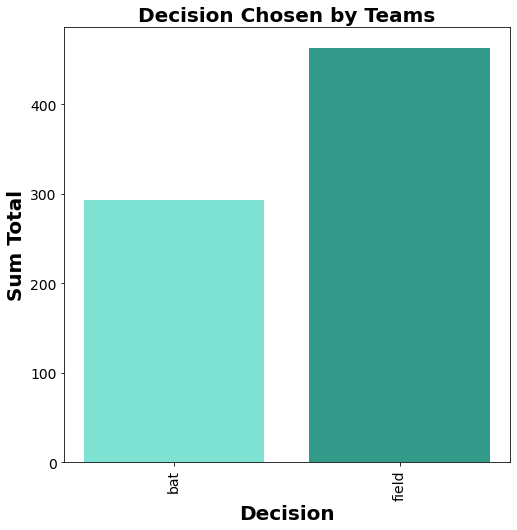

In [115]:
# Lets plot the tosses won by each team
plt.figure(figsize = (8, 8))
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 14)

plt.title("Decision Chosen by Teams", fontweight = 'bold', fontsize = 20)
plt.xlabel('Decision', fontweight = 'bold', fontsize = 20)
plt.ylabel('Sum Total', fontweight = 'bold', fontsize = 20)

plt.bar(decision_df['Decision'], decision_df['Total'], color=['#7DE2D1', '#339989']);

## **Conclusion**

**We can see that teams that won toss chosen bat first - 293 times, and chosen field first 463 times**

## **Task-13 Toss Decision proven beneficial (bat/field)**

### **In this step we will be getting the most beneficial toss decision**

In [116]:
# Dataset of teams which elected field or bat first
toss_field_df = match_df.loc[(match_df['toss_winner'] == match_df['winner']) & (match_df['toss_decision'] == 'field'), ['id', 'winner', 'toss_decision']]
toss_bat_df = match_df.loc[(match_df['toss_winner'] == match_df['winner']) & (match_df['toss_decision'] == 'bat'), ['id', 'winner', 'toss_decision']]

In [117]:
toss_field_df

,id,winner,toss_decision
1,2,Rising Pune Supergiant,field
2,3,Kolkata Knight Riders,field
3,4,Kings XI Punjab,field
5,6,Sunrisers Hyderabad,field
6,7,Mumbai Indians,field
...,...,...,...
749,11345,Royal Challengers Bangalore,field
750,11346,Kings XI Punjab,field
751,11347,Mumbai Indians,field
753,11413,Delhi Capitals,field


In [118]:
# Total number of match winner
toss_field_df.winner.count()

259

In [119]:
toss_bat_df

,id,winner,toss_decision
4,5,Royal Challengers Bangalore,bat
14,15,Delhi Capitals,bat
20,21,Sunrisers Hyderabad,bat
50,51,Delhi Capitals,bat
54,55,Royal Challengers Bangalore,bat
...,...,...,...
713,11309,Chennai Super Kings,bat
729,11325,Mumbai Indians,bat
741,11337,Delhi Capitals,bat
746,11342,Mumbai Indians,bat


In [120]:
# Total number of match winner
toss_bat_df.winner.count()

134

In [121]:
# Let's convert it into dataframe
frames = [toss_bat_df, toss_field_df]
result_df = pd.concat(frames)
result_df = result_df.groupby('toss_decision')[['id']].count()
result_df

,id
toss_decision,
bat,134
field,259


In [122]:
# Now Lets Plot the graph of winning toss benefit
result_df = result_df.sort_values('id').reset_index()
result_df.rename(columns={'id' : 'Total', 'toss_decision' : 'Decision'}, inplace = True)
result_df

,Decision,Total
0,bat,134
1,field,259


In [123]:
# Decision taken table
decision_df

,Decision,Total
0,bat,293
1,field,463


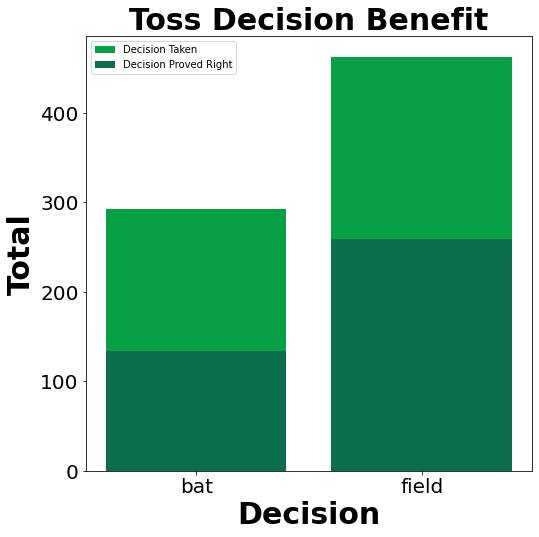

In [124]:
# Lets plot a graph for better understanding
plt.figure(figsize = (8, 8))

plt.title("Toss Decision Benefit", fontweight = 'bold', fontsize = 30)
plt.xlabel('Decision', fontweight = 'bold', fontsize = 30)
plt.ylabel('Total', fontweight = 'bold', fontsize = 30)

plt.tick_params(labelsize = 20)

plt.bar(decision_df['Decision'], decision_df['Total'], color=['#08A045','#08A045']);
plt.bar(result_df['Decision'], result_df['Total'], color=['#0B6E4F','#0B6E4F']);
plt.legend(['Decision Taken', 'Decision Proved Right']);

## **Conclusion**

**For toss winning team 134 out of 293 times bat first was proven right, whereas team chosen field first 259 out of 463 was proven right**

## **Task-14 Umpires data**

### **Let's analyse the umpires data and find umpires in no of matches**

In [125]:
# Let us concat the "umpire1" and "umpire2"
umpire_df = pd.Series(pd.concat([match_df['umpire1'], match_df['umpire2']]), name = "total_matches")

In [126]:
# Print the umpire data
umpire_df

0         AY Dandekar
1      A Nand Kishore
2         Nitin Menon
3        AK Chaudhary
4                 NaN
            ...      
751          O Nandan
752       Nitin Menon
753               NaN
754    Bruce Oxenford
755         Ian Gould
Name: total_matches, Length: 1512, dtype: object

In [127]:
# Count the value of each umpire
umpire_df = umpire_df.value_counts()
umpire_df = umpire_df.to_frame().reset_index()
umpire_df.rename(columns = {'index' : 'umpire_name'}, inplace = True)

In [128]:
# Print first ten rows
umpire_df.head(10)

,umpire_name,total_matches
0,S Ravi,106
1,HDPK Dharmasena,87
2,C Shamshuddin,73
3,AK Chaudhary,58
4,SJA Taufel,55
5,M Erasmus,54
6,Asad Rauf,51
7,Nitin Menon,42
8,BR Doctrove,42
9,RE Koertzen,41


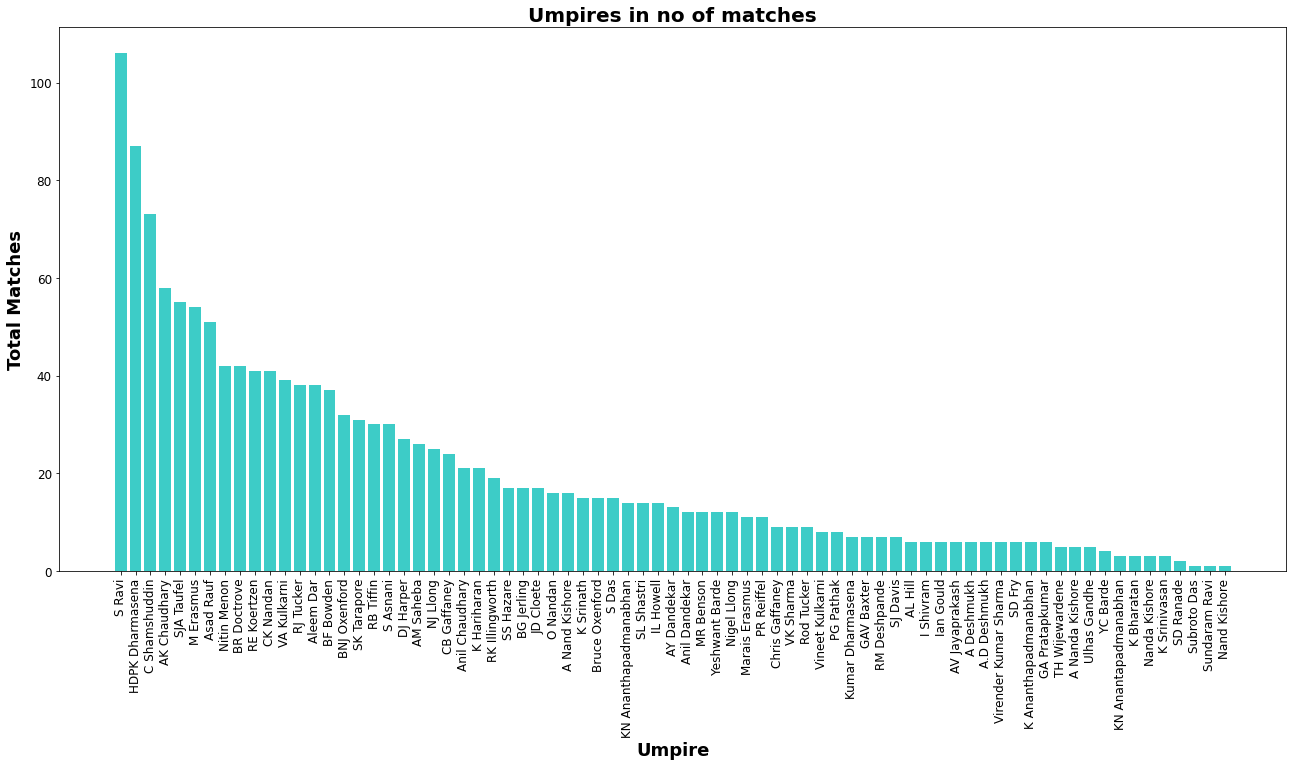

In [129]:
# Plot the bar graph for umpires dataset
plt.figure(figsize = (22, 10))
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 12)

plt.xlabel('Umpire', fontweight = 'bold', fontsize = 18)
plt.ylabel('Total Matches', fontweight = 'bold', fontsize = 18)
plt.title('Umpires in no of matches', fontweight = 'bold', fontsize = 20);

plt.bar(umpire_df['umpire_name'], umpire_df['total_matches'], color = ['#3DCCC7']);

## **Conclusion**

**Top 3 umpires are - S Ravi - 106 matches, HDPK Dharamsena - 87 matches, and C Shamshuddin - 73 matches**

## **Task-15 Team that Win By Highest Runs Gap**

### **Find the teams that won the match with highest number of runs**

In [130]:
# Teams win by runs data
win_by_run_df = match_df[['winner', 'win_by_runs']]

In [131]:
# Print data
win_by_run_df

,winner,win_by_runs
0,Sunrisers Hyderabad,35
1,Rising Pune Supergiant,0
2,Kolkata Knight Riders,0
3,Kings XI Punjab,0
4,Royal Challengers Bangalore,15
...,...,...
751,Mumbai Indians,0
752,Mumbai Indians,0
753,Delhi Capitals,0
754,Chennai Super Kings,0


In [132]:
# Group by the winner team and win_by_runs list
groups_win_by_runs = win_by_run_df.groupby('winner')['win_by_runs'].apply(list)

In [133]:
# Let's reset the index
win_by_run_df = groups_win_by_runs.reset_index(name = 'runs_list_values')

In [134]:
# Print the dataframe
win_by_run_df

,winner,runs_list_values
0,Chennai Super Kings,"[33, 6, 0, 13, 0, 18, 3, 0, 0, 92, 38, 18, 78,..."
1,Deccan Chargers,"[0, 0, 0, 24, 12, 0, 19, 53, 0, 0, 6, 31, 6, 1..."
2,Delhi Capitals,"[97, 51, 0, 0, 0, 7, 0, 0, 10, 0, 12, 0, 0, 0,..."
3,Gujarat Lions,"[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]"
4,Kings XI Punjab,"[0, 0, 26, 0, 19, 14, 7, 66, 0, 0, 9, 0, 0, 41..."
5,Kochi Tuskers Kerala,"[0, 0, 6, 0, 17, 0]"
6,Kolkata Knight Riders,"[0, 0, 17, 0, 82, 0, 0, 0, 0, 140, 0, 5, 23, 2..."
7,Mumbai Indians,"[0, 0, 0, 0, 0, 14, 0, 0, 146, 9, 0, 1, 0, 29,..."
8,Rajasthan Royals,"[0, 0, 0, 45, 0, 0, 0, 65, 0, 10, 0, 105, 0, 0..."
9,Rising Pune Supergiant,"[0, 27, 0, 3, 61, 0, 0, 12, 0, 20, 0, 0, 0, 0,..."


In [135]:
# Make winner and runs dictionary
winner_dict = dict(zip(win_by_run_df['winner'], win_by_run_df['runs_list_values']))

In [136]:
# Function to find highest runs wins of each team
def highest_runs_list(runs_list):
  return max(runs_list)

In [137]:
# Loop over the runs list values from dictionary
for item in winner_dict.keys():
  winner_dict[item] = highest_runs_list(winner_dict[item])

In [138]:
# Print winner dict
winner_dict

{'Chennai Super Kings': 97,
 'Deccan Chargers': 82,
 'Delhi Capitals': 97,
 'Gujarat Lions': 1,
 'Kings XI Punjab': 111,
 'Kochi Tuskers Kerala': 17,
 'Kolkata Knight Riders': 140,
 'Mumbai Indians': 146,
 'Rajasthan Royals': 105,
 'Rising Pune Supergiant': 61,
 'Royal Challengers Bangalore': 144,
 'Sunrisers Hyderabad': 118}

In [139]:
# Convert the winner dictionary to dataframe
max_run_win_team = pd.DataFrame.from_dict(winner_dict, orient = 'index', columns=['win_by_runs'])

In [140]:
# Sort the max runs win
max_run_win_team.sort_values(by = ['win_by_runs'], ascending = False, inplace = True)

In [141]:
# Reset the index
max_run_win_team = max_run_win_team.reset_index()

In [142]:
# Rename some of the column
max_run_win_team.rename(columns = {'index' : 'teams'}, inplace = True)

In [143]:
max_run_win_team

,teams,win_by_runs
0,Mumbai Indians,146
1,Royal Challengers Bangalore,144
2,Kolkata Knight Riders,140
3,Sunrisers Hyderabad,118
4,Kings XI Punjab,111
5,Rajasthan Royals,105
6,Chennai Super Kings,97
7,Delhi Capitals,97
8,Deccan Chargers,82
9,Rising Pune Supergiant,61


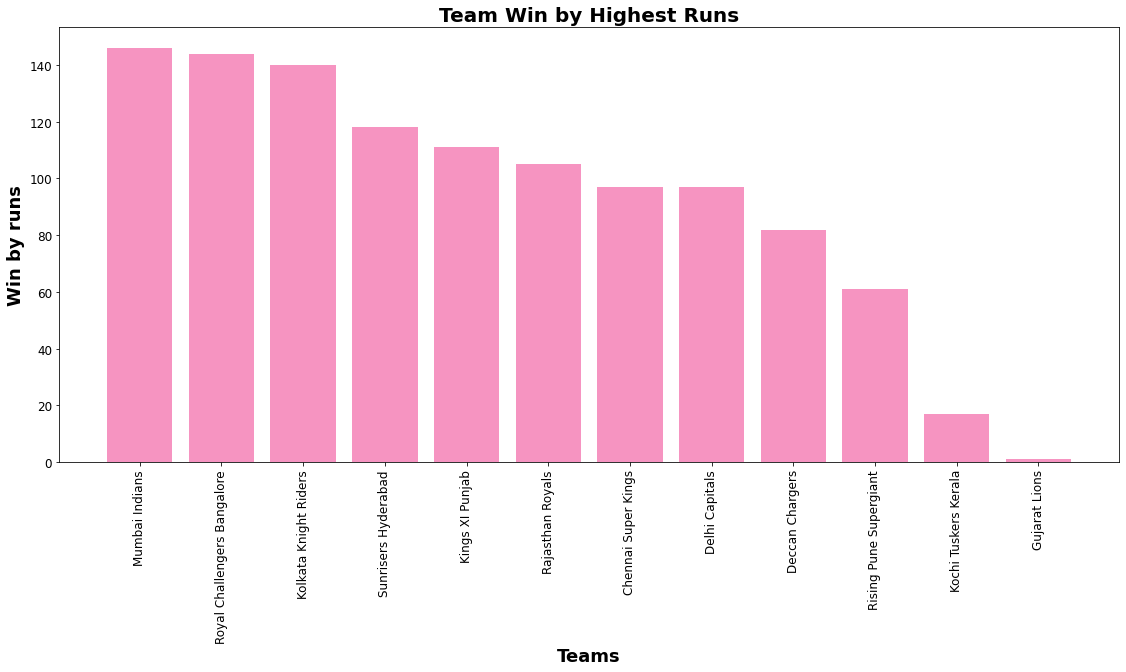

In [144]:
# Let us plot for better understanding
plt.figure(figsize = (19, 8))
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 12)

plt.xlabel('Teams', fontweight = 'bold', fontsize = 18)
plt.ylabel('Win by runs', fontweight = 'bold', fontsize = 18)
plt.title('Team Win by Highest Runs', fontweight = 'bold', fontsize = 20);

plt.bar(max_run_win_team['teams'], max_run_win_team['win_by_runs'], color = ['#F694C1']);

## **Conclusion**

**According to above observation we can see that 'Mumbai Indians' recorded highest runs win of 146 runs, followed by the 'RCB' 144 runs**

## **Task-16 Team that Win By Highest Wickets**

### **In this step we will be getting the teams win by wickets and the team which win by highest wickets**

In [145]:
# Teams win by wicket data
win_by_wickets_df = match_df[['winner', 'win_by_wickets']]

In [146]:
# Print win by wickets
win_by_wickets_df

,winner,win_by_wickets
0,Sunrisers Hyderabad,0
1,Rising Pune Supergiant,7
2,Kolkata Knight Riders,10
3,Kings XI Punjab,6
4,Royal Challengers Bangalore,0
...,...,...
751,Mumbai Indians,9
752,Mumbai Indians,6
753,Delhi Capitals,2
754,Chennai Super Kings,6


In [147]:
# Group by the winner team and win_by_wickets list
groups_win_by_wickets = win_by_wickets_df.groupby('winner')['win_by_wickets'].apply(list)

In [148]:
# Reset the index
win_by_wickets_df = groups_win_by_wickets.reset_index(name = 'wicket_list_values')

In [149]:
win_by_wickets_df

,winner,wicket_list_values
0,Chennai Super Kings,"[0, 0, 9, 0, 4, 0, 0, 7, 9, 0, 0, 0, 0, 0, 7, ..."
1,Deccan Chargers,"[10, 7, 8, 0, 0, 6, 0, 0, 6, 6, 0, 0, 0, 0, 7,..."
2,Delhi Capitals,"[0, 0, 6, 7, 2, 0, 9, 9, 0, 8, 0, 5, 5, 10, 0,..."
3,Gujarat Lions,"[7, 4, 7, 6, 5, 7, 3, 6, 0, 3, 5, 6, 6]"
4,Kings XI Punjab,"[6, 8, 0, 10, 0, 0, 0, 0, 4, 7, 0, 6, 9, 0, 0,..."
5,Kochi Tuskers Kerala,"[8, 7, 0, 7, 0, 8]"
6,Kolkata Knight Riders,"[10, 8, 0, 4, 0, 7, 7, 6, 7, 0, 5, 0, 0, 0, 3,..."
7,Mumbai Indians,"[4, 4, 4, 6, 8, 0, 0, 5, 0, 0, 6, 0, 7, 0, 7, ..."
8,Rajasthan Royals,"[6, 3, 7, 0, 8, 8, 3, 0, 6, 0, 5, 0, 3, 0, 5, ..."
9,Rising Pune Supergiant,"[7, 0, 6, 0, 0, 5, 4, 0, 9, 0, 7, 4, 5, 6, 0, ..."


In [150]:
# Make winner and wickets dictionary
winner_dict = dict(zip(win_by_wickets_df['winner'], win_by_wickets_df['wicket_list_values']))

In [151]:
# Function to find highest wickets wins of each team
def highest_wickets_list(wickets_list):
  return max(wickets_list)

In [152]:
# Loop over the wickets list values from dictionary
for item in winner_dict.keys():
  winner_dict[item] = highest_wickets_list(winner_dict[item])

In [153]:
winner_dict

{'Chennai Super Kings': 10,
 'Deccan Chargers': 10,
 'Delhi Capitals': 10,
 'Gujarat Lions': 7,
 'Kings XI Punjab': 10,
 'Kochi Tuskers Kerala': 8,
 'Kolkata Knight Riders': 10,
 'Mumbai Indians': 10,
 'Rajasthan Royals': 10,
 'Rising Pune Supergiant': 9,
 'Royal Challengers Bangalore': 10,
 'Sunrisers Hyderabad': 10}

In [154]:
# Convert the winner dictionary to dataframe
max_wickets_win_team = pd.DataFrame.from_dict(winner_dict, orient = 'index', columns=['win_by_wickets'])

In [155]:
# Sort the max wickets win
max_wickets_win_team.sort_values(by = ['win_by_wickets'], ascending = False, inplace = True)

In [156]:
# Reset the index
max_wickets_win_team = max_wickets_win_team.reset_index()

In [157]:
# Rename the columns
max_wickets_win_team.rename(columns = {'index' : 'teams'}, inplace = True)

In [158]:
# Print df
max_wickets_win_team

,teams,win_by_wickets
0,Chennai Super Kings,10
1,Deccan Chargers,10
2,Delhi Capitals,10
3,Kings XI Punjab,10
4,Kolkata Knight Riders,10
5,Mumbai Indians,10
6,Rajasthan Royals,10
7,Royal Challengers Bangalore,10
8,Sunrisers Hyderabad,10
9,Rising Pune Supergiant,9


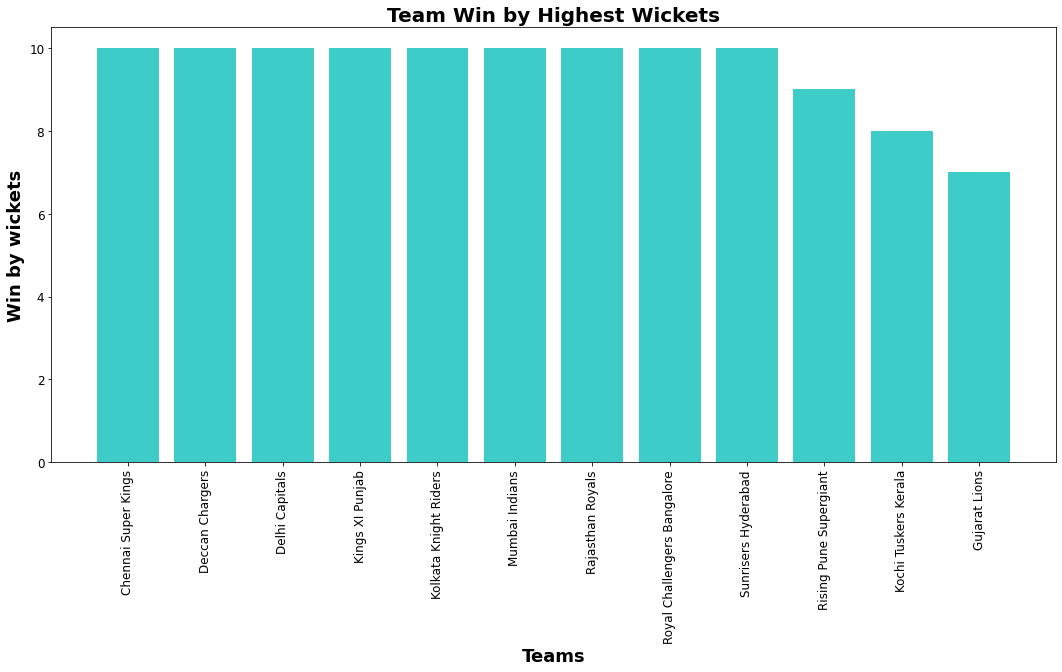

In [159]:
# Let us plot for better understanding
plt.figure(figsize = (18, 8))
plt.xticks(rotation = 90)
plt.tick_params(labelsize = 12)

plt.xlabel('Teams', fontweight = 'bold', fontsize = 18)
plt.ylabel('Win by wickets', fontweight = 'bold', fontsize = 18)
plt.title('Team Win by Highest Wickets', fontweight = 'bold', fontsize = 20);

plt.bar(max_wickets_win_team['teams'], max_wickets_win_team['win_by_wickets'], color = ['#3DCCC7']);

## **Conclusion**

**From above observation we can see that there are total 9 teams that win by 10 wickets**

## **Task-17 Player of the Match most number of the time**

### **In this step we will be getting the player of the match most of the time**

In [160]:
# Count the player of the match
player_of_the_match_df = match_df.groupby('player_of_match')[['id']].count()

In [161]:
# Sort and rename the column
player_of_the_match_df = player_of_the_match_df.sort_values('id', ascending = True).reset_index()
player_of_the_match_df.rename(columns = {'id' : 'total', 'player_of_match' : 'Player'}, inplace = True)

In [162]:
player_of_the_match_df

,Player,total
0,A Chandila,1
1,M Ur Rahman,1
2,MA Starc,1
3,MD Mishra,1
4,MF Maharoof,1
...,...,...
221,RG Sharma,17
222,DA Warner,17
223,MS Dhoni,17
224,AB de Villiers,20


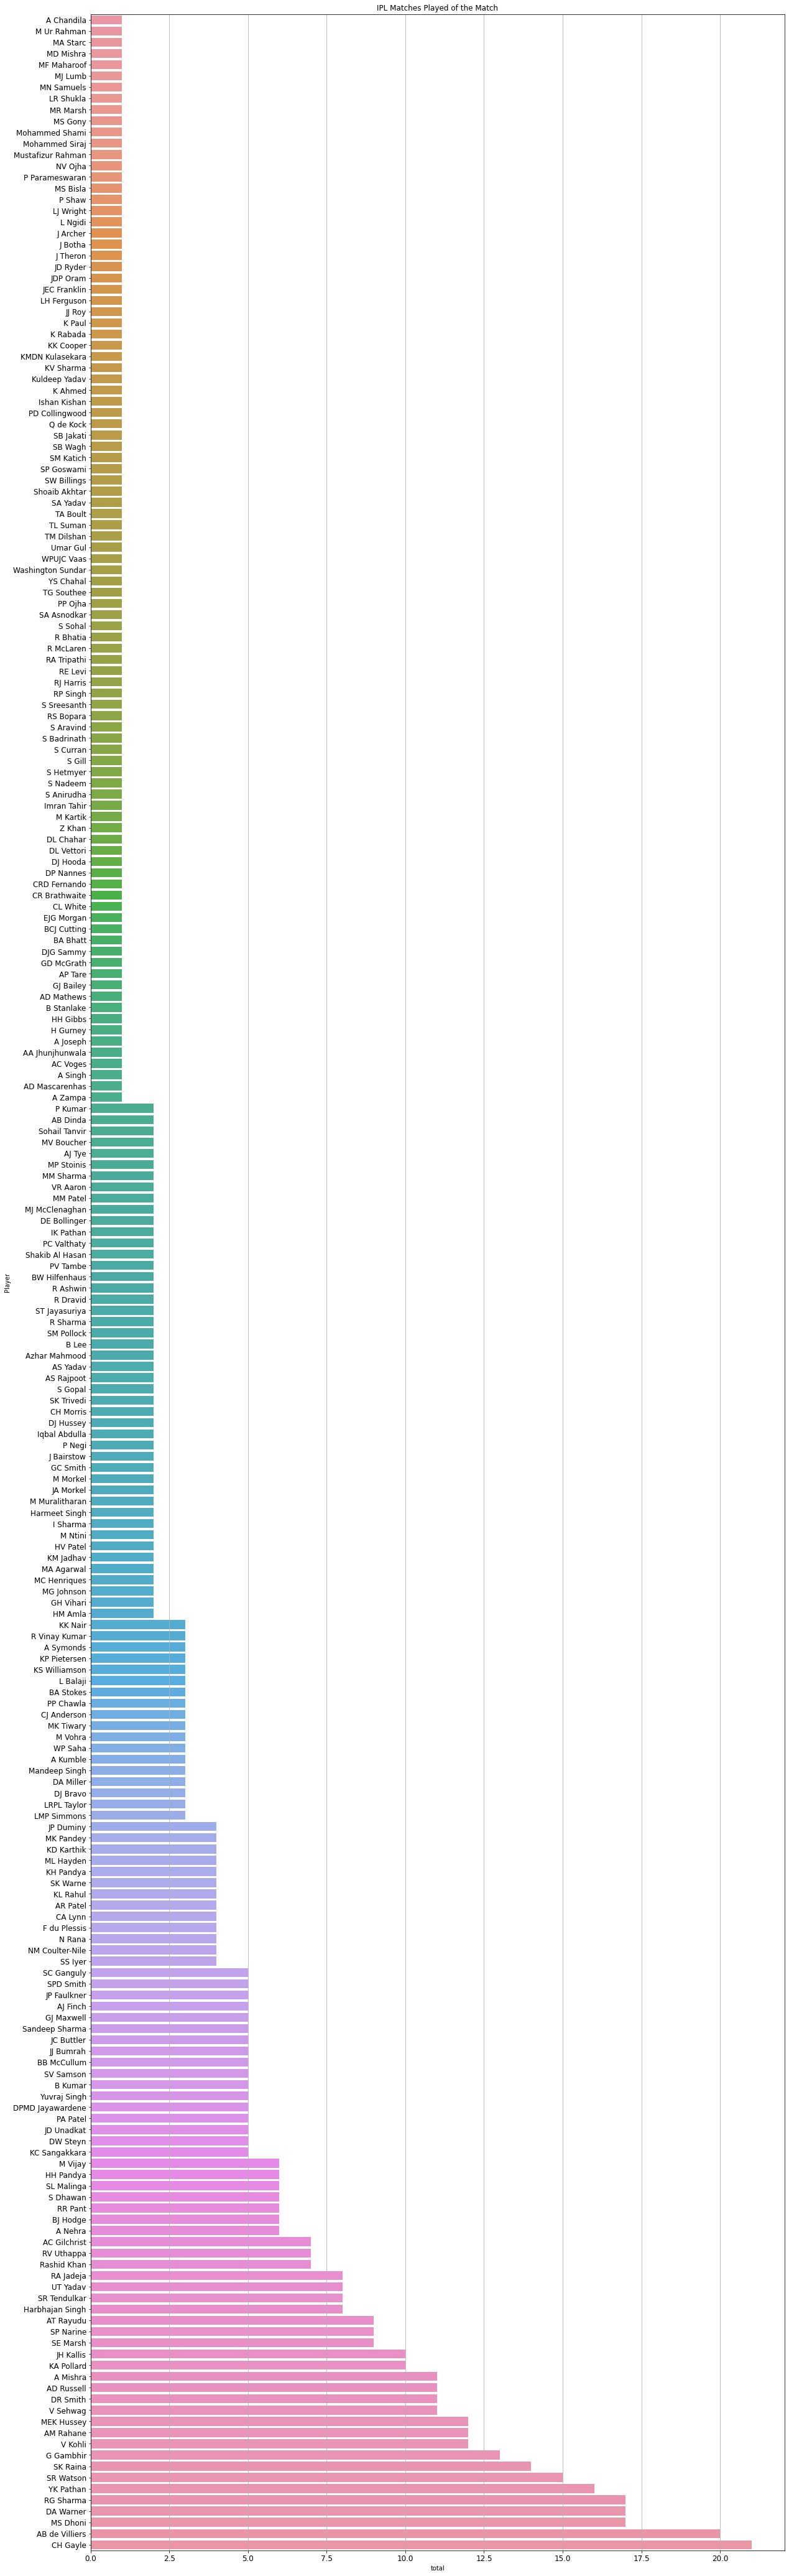

In [163]:
# Let us plot graph for better understanding
plt.figure(figsize = (20, 75))
plt.grid()
plt.tick_params(labelsize = 12)
plt.title('IPL Matches Played of the Match')
sns.barplot(x = 'total', y = 'Player', data = player_of_the_match_df);

## **Conclusion**

**From above graph we can see that top 3 players of the match are 'Chris Gayle' - 21 times, 'AB De Villiers' - 20 times, and 'MS Dhoni' - 17 times**

# **Final Conclusion of Matches Dataframe analysis**

**Data Cleaning**
1. Major data cleaning was required at teams name and city name- we updated them in matches dataset - "Delhi Daredevils" - "Delhi Capitals", "Pune Warriors" - "Rising Pune Supergiant", "Bengalore" - "Bengaluru"
2. Umpires3 column was dropped because of 637 NaN values out of 756 rows
3. Empty city names were also updated according to the stadium - "Dubai"

## **Exploratory Data Analysis of Matches DataFrame**

**General IPL Analysis**
1. There are total of 12 IPL Seasons starting from 2008 to 2019
2. We calculated each season start date, end date and number of days each season last, we got that 2012 and 2013 seasons lasts for 53 days
3. Also got to know about number of matches each season conducted - 2013 season conducted 76 matches folowed by the 2012 season
***Above data shows that 2012 and 2013 IPL Seasons are lasted for most number of days and conducted most number of matches**

##------------------------------------------------------------------##

**City and Venue Analysis**
1. Venue and City that hosted most number of matches were Eden Gardens and Mumbai
2. Venues that hosted most number of IPL Finals matches were Dr DY Patil Sports Academy (17%), Eden Gardens (17%), M Chinnaswamy Stadium (17%), MA Chidambaram Stadium, Chepauk (17%)
1. City that hosted most number of IPL Finals matches were Mumbai (25%), followed by the Bengaluru (17%)
***Above data shows that Mumbai City and Eden Gardens Venue hosted most number matches as well as most number of IPL finals**

##------------------------------------------------------------------##

**Team Data Analysis**
1. Total Number of matches played by each team are - 187 by Mumbai Indians, 180 by Royal Challengers Bengalore, and 178 by Kolkata Night Riders
2. Total number of IPL Matches won by each team are - 109 by Mumbai Indians, 100 by Chennai Super Kings and 82 by Kolkata Night Riders
3. Percentage wins of each team (played vs wins matches) - 61% by Chennai Super Kings, 58.3% by Mumbai Indians, 53.7% by Sunrisers Hyderabad
4. IPL Matches season winners highest number of times - Mumbai Indians won 4 IPL Seasons, followed by the Chennai Super Kings 3 IPL Seasons, and 2 by Kolkata Knight Riders
***Above analysis shows that Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders are top 3 teams of the IPL**

##------------------------------------------------------------------##

**Toss Data Analysis**
1. Teams that won most number of tosses - Mumbai Indians 98, Kolkata Knight Riders 92, and Delhi Capitals 90, followed by the Chennai Super Kings 89
2. Match Decision on winning the toss - 293 times teams chosen bat first, where as 463 times teams chosen field first
3. Match Decision taken after winning the toss proven right - bat first 134 wins out of 293 (45%), and field first 259 wins out of 463 (56%)
***Toss data analysis shows that Mumbai Indians, Kolkata Knight Riders, Delhi Capitals, and Chennai Super Kings are top 4 teams to win IPL Toss**

##------------------------------------------------------------------##

**Umpire Data Analysis**
1. Umpires for most number of matches are - S Ravi 106 matches, HDPK Dharmasena 87 matches, and C Shamshuddin 73 matches

##------------------------------------------------------------------##

**Runs and Wickets Data Analysis**
1. Teams that won by highest runs gap are - Mumbai Indians 146 runs, Royal Challenger Bangalore 144 runs and Kolkata Knight Riders by 140 runs
2. Teams that won by highest wickets gap are - All the teams except (Gujrat Lions, Rising Pune, Kochi Tuskers) have won the match by 10 wickets at least once
***We can say that again Mumbai Indians, Kolkata Knight Riders and Chennai Super Kings are among top teams with highest runs and wickets margin**

##------------------------------------------------------------------##

**Players Data Analysis**
1. Player of the match most number of times - Chris Gayle 21 times, Ab De Villiers 20 times, MS Dhoni 17 Times followed by Rohit Sharma and David Warner

##------------------------------------------------------------------##

# **Final Conclusion**
1. A total of 756 matches played in between 2008-2019 IPL
2. Most Number of Matches Played in Mumbai and Eden Gardens stadium
3. Mumbai Indians, Chennai Super Kings and Kolkata Knight Riders are Dominated Teams of all IPL Seasons

